# Import neccessary packages

In [1]:
import os
import sys
# Add Scripts folder to sys.path
script_path = os.path.abspath(os.path.join(os.getcwd(), "..", "Scripts"))
if script_path not in sys.path:
    sys.path.append(script_path)
import re
import numpy as np
from PIL import Image
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import load
from ML_Func import *

# SET parameters

In [2]:
IMAGE_DIR          = 'Dataset_images/'     # 存放 slice-001.png, slice-003.png, …, slice-011.png
TARGET_SIZE        = (256, 256)
SAMPLES_PER_TRIPLE = 2000
MODEL_PATH         = 'Model/interp_rf.pkl'
TEST_SIZE          = 0.2
ORIG_SIZE          = (868, 1551)

# Load and Test Model

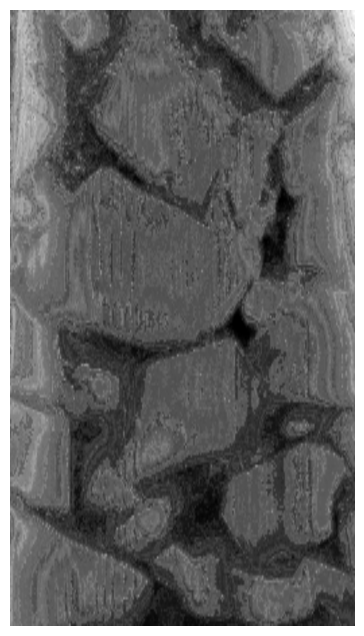

SSIM: 0.379352830381864, PSNR: 3.358463097238445


In [3]:
os.chdir("..")
# Load the trained regression model from the specified file path
model = load(MODEL_PATH)

# Use the model to predict the middle image between two given slices
# Arguments:
# - model: the trained model loaded from disk
# - 'Dataset_images/slice-003.png': the first image (frame A)
# - 'Dataset_images/slice-005.png': the second image (frame B)
# - 'Machine_learning_predictions/slice-004-interp.png': the output file path to save the predicted image
# - TARGET_SIZE: the input size that the model expects (e.g., 800×800)
# - ORIG_SIZE: the original image size to which the result may be resized back (e.g., 1551×868)
Pred = predict_middle(
    model,
    'Sample_Dataset/slice-003.png',
    'Sample_Dataset/slice-005.png',
    'Sample_Dataset/slice-004-interp_ml.png',
    TARGET_SIZE,
    ORIG_SIZE
)

# Display the predicted image
display_image(Pred)

# Test the model
ssim_value, psnr_value = calculate_metrics(
    'Sample_Dataset/slice-004-interp_ml.png',
    'Sample_Dataset/slice-004.png'
)
print(f"SSIM: {ssim_value}, PSNR: {psnr_value}")
